# Spectre cannelé

Ce script permet de tracer le spectre lumineux obtenu en un point donnée de la figure d'interférences des fentes d'Young en lumière blanche.

In [1]:
# librairies pour l'interaction
%matplotlib notebook
from ipywidgets import interact, FloatSlider, IntSlider, Layout
import ipywidgets as widgets

In [2]:
# librairies scientifiques usuelles
# graphiques
import matplotlib.pyplot as plt
from numpy import pi, exp, linspace, cos, meshgrid, sinc, arange
import matplotlib.colors
from matplotlib.colors import LinearSegmentedColormap

Les paramètres des fentes :

In [3]:
a = 500e-6 # m
D = 1 # m
I0 = 1

L'expression de l'intensité en fonction de la position et de la longueur d'onde considérée.

In [4]:
def I(x, lambda0):
    return 2*I0*(1+cos(2*pi*a*x/(lambda0*1e-9*D)))

In [5]:
# Un bloc pour générer les couleurs du spectre visible

def wavelength_to_rgb(wavelength, gamma=0.8):
    ''' taken from http://www.noah.org/wiki/Wavelength_to_RGB_in_Python
    This converts a given wavelength of light to an 
    approximate RGB color value. The wavelength must be given
    in nanometers in the range from 380 nm through 750 nm
    (789 THz through 400 THz).

    Based on code by Dan Bruton
    http://www.physics.sfasu.edu/astro/color/spectra.html
    Additionally alpha value set to 0.5 outside range
    '''
    wavelength = float(wavelength)
    if wavelength >= 380 and wavelength <= 750:
        A = 1.
    else:
        A=0.5
    if wavelength < 380:
        wavelength = 380.
    if wavelength >750:
        wavelength = 750.
    if wavelength >= 380 and wavelength <= 440:
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength >= 440 and wavelength <= 490:
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ** gamma
        B = 1.0
    elif wavelength >= 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ** gamma
    elif wavelength >= 510 and wavelength <= 580:
        R = ((wavelength - 510) / (580 - 510)) ** gamma
        G = 1.0
        B = 0.0
    elif wavelength >= 580 and wavelength <= 645:
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ** gamma
        B = 0.0
    elif wavelength >= 645 and wavelength <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0
    return (R,G,B,A)

clim=(350,780)
norm = plt.Normalize(*clim)
wl = arange(clim[0],clim[1]+1,2)
colorlist = list(zip(norm(wl),[wavelength_to_rgb(w) for w in wl]))
spectralmap = LinearSegmentedColormap.from_list("spectrum", colorlist)

<IPython.core.display.Javascript object>


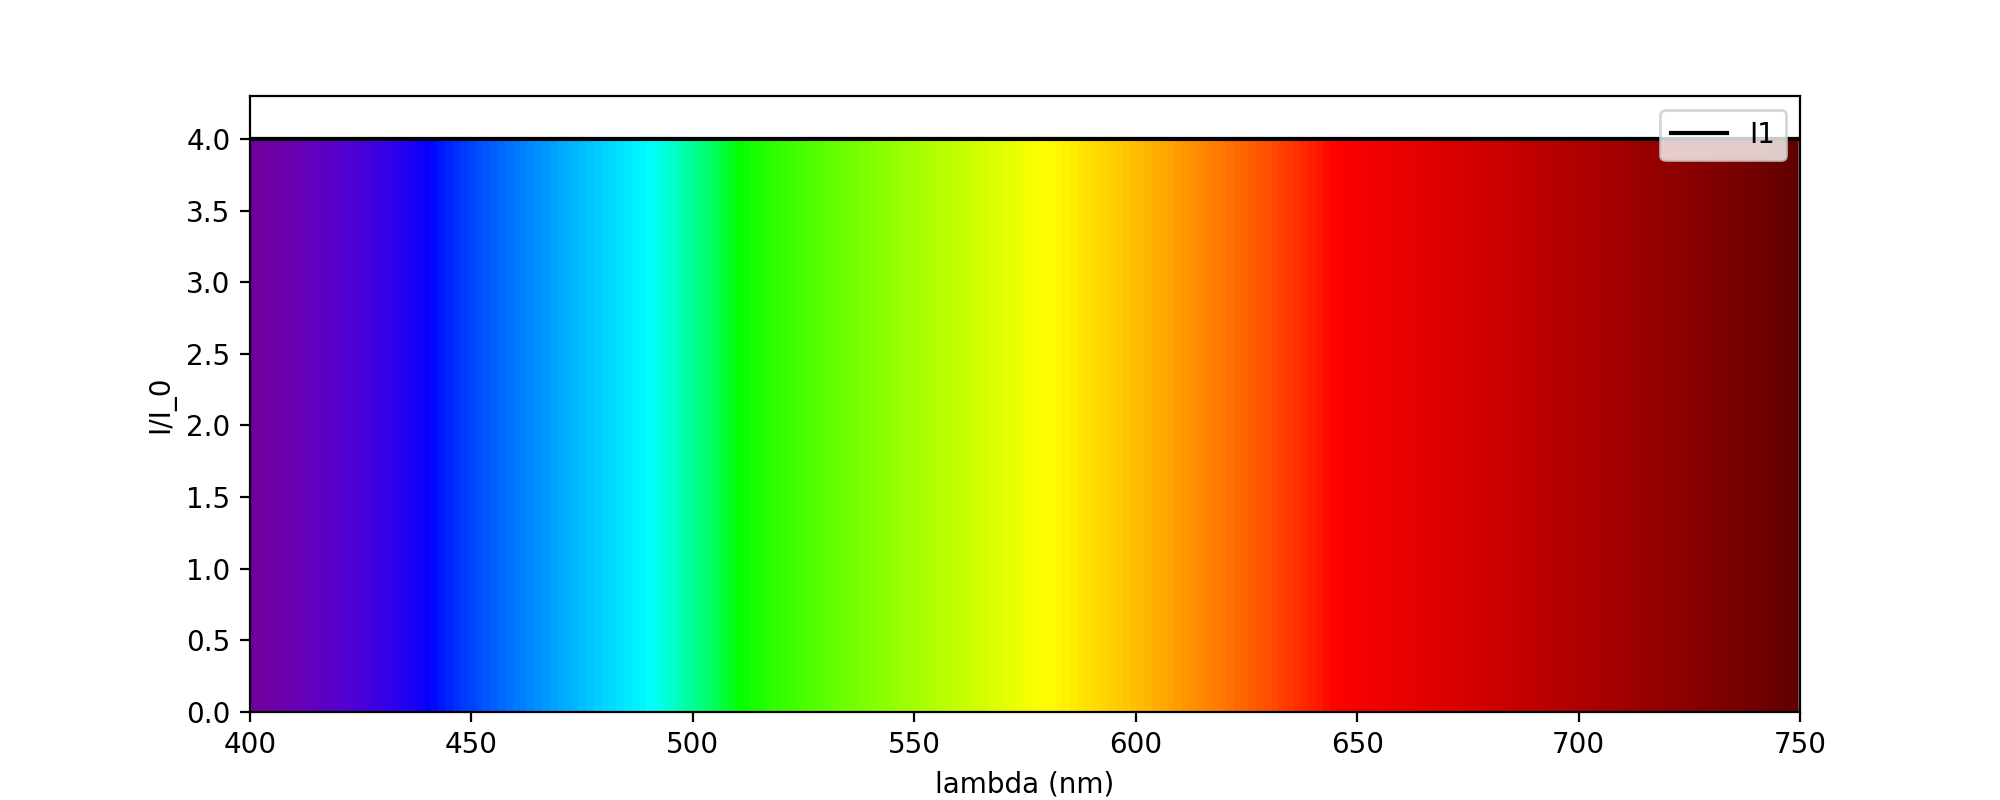

interactive(children=(FloatSlider(value=0.0, description='x (m)', layout=Layout(width='100%'), max=0.01, reado…

<function __main__.update_lambda(x=0)>

In [6]:
# Tracé du graphique

# paramètres d'affichage
lambdamin = 400  # nm
lambdamax = 750  # nm
npoints = 2000
xlambda = linspace(lambdamin, lambdamax, npoints)

fig = plt.figure("Spectre cannelé", figsize=(10, 4))
ax = fig.add_subplot(111)


x=0
plt.xlim([lambdamin, lambdamax])

ymax=4.3
plt.ylim([0, ymax])


l_spectre, = plt.plot(xlambda, I(x, xlambda), label='I1', color='black')

plt.xlabel('lambda (nm)')
plt.ylabel('I/I_0')
plt.legend(loc=1)



y = linspace(0, ymax, 2)
X,Y = meshgrid(xlambda, y)

extent=(lambdamin, lambdamax, min(y), max(y))

plt.imshow(X, clim=clim,  extent=extent, cmap=spectralmap, aspect='auto')
ax.fill_between(xlambda, I(x, xlambda), 8, color='w')


# Gestion des mises à jour lorsqu'on déplace le curseur

xmax = 1e-2


x_widget = FloatSlider(min=0, max=xmax, value=0, step=xmax/200,
                             layout=Layout(width='100%'), description='x (m)',  readout_format='.2e')


def update_lambda(x=0):
    """Met à jour le graphique lorsqu'on déplace le curseur"""
    l_spectre.set_data([xlambda, I(x, xlambda)])
    for coll in (ax.collections):
        ax.collections.remove(coll)
    ax.fill_between(xlambda, I(x, xlambda), 8, color='w')
    #path.vertices[:, 1] *= 0.9
    plt.draw()


interact(update_lambda, x=x_widget)